<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-programming" data-toc-modified-id="Linear-programming-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear programming</a></span><ul class="toc-item"><li><span><a href="#Definition" data-toc-modified-id="Definition-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Definition</a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Examples</a></span></li></ul></li><li><span><a href="#Solving-a-problem" data-toc-modified-id="Solving-a-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Solving a problem</a></span><ul class="toc-item"><li><span><a href="#Solvers" data-toc-modified-id="Solvers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Solvers</a></span></li><li><span><a href="#Using-SciPy's-linprog" data-toc-modified-id="Using-SciPy's-linprog-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Using SciPy's linprog</a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Examples</a></span></li></ul></li><li><span><a href="#Resource-allocation" data-toc-modified-id="Resource-allocation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Resource allocation</a></span></li></ul></div>

In [6]:
%load_ext nb_js_diagrammers

The nb_js_diagrammers extension is already loaded. To reload it, use:
  %reload_ext nb_js_diagrammers


In [7]:
%%html
<style>
.prompt_container { display: none !important; }
.prompt { display: none !important; }
.run_this_cell { display: none !important; }

.slides {
    position: absolute;
    top: 0;
    left: 0;
}
</style>

# Resource Allocation

Cell

Thi-Mai-Trang Nguyen CELL (LIP6-Sorbonne Université)

**Fabien Mathieu** (Swapcard)

## Linear programming

### Definition

# Optimization problem

- An optimization problem aims at finding the best solution among the possible solutions
  - Example: find the shortest path
- An optimization problem is usually composed of three parts:
  - Decision variables
  - Objective function (maximize or minimize)
  - Constraints

# Decision variables

- Represents the possible choices that can be done.
- Usually denoted $x=x_1, x_2, \ldots, x_n$
- $x_i\in \{0, 1\}$: binary decision (do or don't)
- $x_i\in \mathbb{Z}$: discrete decision decision (how many?)
- $x_i\in \mathbb{R}$: continuous decision (how much?)

Question: what is more difficult?

# Objective function

- $x\rightarrow f(x)$
- Maximize: $\mathrm{argmax}_x f(x)$
- Minimize: $\mathrm{argmin}_x f(x)$

Remark: $\mathrm{argmax}_x f(x) \Leftrightarrow \mathrm{argmin}_x -f(x)$

# Constraints

$$
\begin{matrix}
A_1(x) \leq b_1\\
A_2(x) \leq b_2\\
A_3(x) \leq b_3
\end{matrix}
$$

Remark: $A(x) \leq b \Leftrightarrow -A(x)\geq -b$: you can convert $\leq$ and $\geq$!

# Linear programming

- An optimization problem whose objective function and constraints are linear functions
- Linear function: $f(x)=\sum_i a_ix_i$, where $a_1,\ldots, a_n$ are scalars.
- Intuition:
  - Linear programming (continuous) is *easy* (it's all about lines and (hyper)planes)
  - Non-linear programming can be *ugly*
  - Many problems can be described as LP

### Examples

# Linear program example

- A store produces and sells pants and jackets. 
  - The price of a pair of pants is \$60. 
  - The price of a jacket is \$50. 
  - Every pair of pants needs $1m^2$ of cotton and $4m^2$ of polyester. 
  - Each jacket needs $2m^2$ of cotton and $2m^2$ of polyester. 
- The store can only buy from its supplier $1,000m^2$ of cotton and $1,600 m^2$ of polyester every month. 
- What is the number of pair of pants and jackets that the store should produce and sell each month in order to maximize its revenue?

# Modeling the LP problem

- Variables: $x_1$ = number of pairs of pants, $x_2$ = number of jackets.
- Objective: maximize $60x_1+50x_2$
- Constraints:

$$
\begin{array}{rcl}
x_1+2x_2 & \leq & 1,000\text{ (cotton)} \\
4x_1+2x_2 & \leq & 1,600\text{ (polyester)}\\
x_1 & \geq & 0\text{ (no anti-pants)}\\
x_2 & \geq & 0\text{ (no anti-jackets)}
\end{array}
$$

# Feasible region

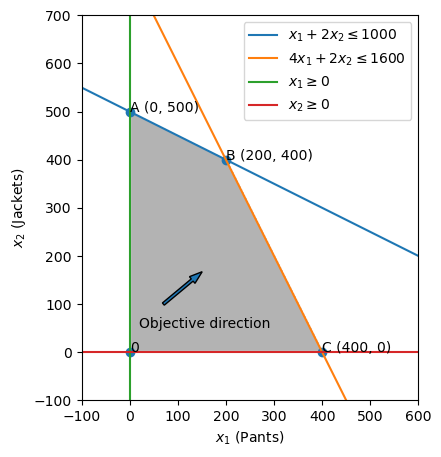

In [8]:
import numpy as np
from matplotlib import pyplot as plt

# plot the feasible region
d = np.linspace(-100,800,300)
x,y = np.meshgrid(d,d)
plt.figure(figsize=(10,5)) 
plt.imshow( ((y>=0) & (4*x+2*y<=1600) & (x+2*y<=1000) & (x>=0).astype(int)) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3)
plt.plot(d, 500-d/2, label = r'$x_1+2x_2\leq 1000$')
plt.plot(d, 800-2*d, label = r'$4x_1+2x_2\leq 1600$')
plt.plot(np.zeros(300), d, label = r'$x_1\geq 0$')
plt.plot(d, np.zeros(300), label = r'$x_2\geq 0$')
plt.xlim([-100, 600])
plt.ylim([-100, 700])
plt.xlabel('$x_1$ (Pants)')
plt.ylabel('$x_2$ (Jackets)')
plt.legend()
x = [0, 0, 200, 400]
y = [0, 500, 400, 0]
n = ["0", "A (0, 500)", "B (200, 400)", "C (400, 0)"]

plt.scatter(x, y)

for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
x, y = 70, 100
plt.arrow(x, y, 60, 50, width=6)
plt.annotate('Objective direction', (x-50, y-50))
plt.show()

# Solution

- Inside the feasibility region (convex polytope)
- The furthest along the objective direction
- If the feasibility region is bounded, an optimal solution exists
- If the feasibility region is not bounded along the objective, no optimal solution exists (grow to infinity)

# Solution

- If there is a best solution (e.g. bounded region), at least one corner of the region is optimal.
- $O (0,0)$:  $60 \times 0 + 50 \times 0 = 0$
- $A (0, 500)$: $60 \times 0 + 50 \times 500 = 25,000$
- $B (200, 400)$: $60 \times 200 + 50 \times 400 = 32,000$
- $C (400, 0)$: $60 \times 400 + 50 \times 0 = 24,000$
- The optimal point is $B(200, 400)$

# Linear program example: a variation

- A small tailor shop produces and sells pants and jackets. 
  - The price of a pair of pants is \$60. 
  - The price of a jacket is \$100. 
  - Every pair of pants needs $4m^2$ of cotton and $3m^2$ of polyester. 
  - Each jacket needs $5m^2$ of cotton and $7m^2$ of polyester. 
- The tailor has $12m^2$ of cotton and $15 m^2$ of polyester. 
- What is the number of pair of pants and jackets that the tailor should make to maximize its revenue?

# Feasible region

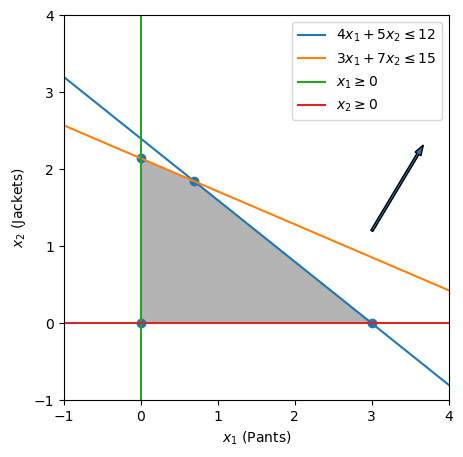

In [9]:
# plot the feasible region
d = np.linspace(-1,4,300)
x,y = np.meshgrid(d,d)
plt.figure(figsize=(10,5)) 
plt.imshow( ((y>=0) & (4*x+5*y<=12) & (3*x+7*y<=15) & (x>=0).astype(int)) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3)
plt.plot(d, 2.4-.8*d, label = r'$4x_1+5x_2\leq 12$')
plt.plot(d, 15/7-3*d/7, label = r'$3x_1+7x_2\leq 15$')
plt.plot(np.zeros(300), d, label = r'$x_1\geq 0$')
plt.plot(d, np.zeros(300), label = r'$x_2\geq 0$')
plt.xlim([-1, 4])
plt.ylim([-1, 4])
plt.xlabel('$x_1$ (Pants)')
plt.ylabel('$x_2$ (Jackets)')
plt.legend()
x = [0, 0, 0.69, 3]
y = [0, 15/7, 1.85, 0]
plt.scatter(x, y)
x, y = 3, 1.2
sc=100
plt.arrow(x, y, 60/sc, 100/sc, width=.03)
plt.show()

# Feasible region

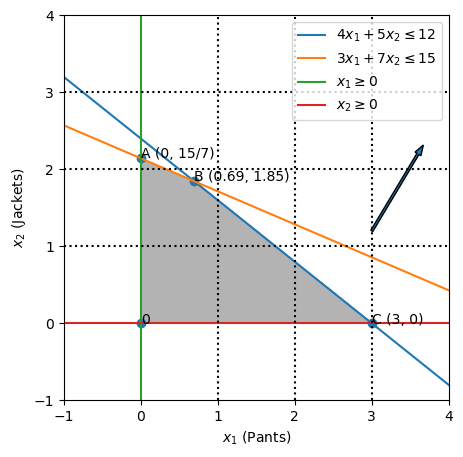

In [10]:
# plot the feasible region
d = np.linspace(-1,4,300)
x,y = np.meshgrid(d,d)
plt.figure(figsize=(10,5)) 
plt.imshow( ((y>=0) & (4*x+5*y<=12) & (3*x+7*y<=15) & (x>=0).astype(int)) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3)
plt.plot(d, 2.4-.8*d, label = r'$4x_1+5x_2\leq 12$')
plt.plot(d, 15/7-3*d/7, label = r'$3x_1+7x_2\leq 15$')
plt.plot(np.zeros(300), d, label = r'$x_1\geq 0$')
plt.plot(d, np.zeros(300), label = r'$x_2\geq 0$')
for i in range(1, 4):
    plt.plot(i*np.ones(300), d, 'k:')
    plt.plot(d, i*np.ones(300), 'k:')
plt.xlim([-1, 4])
plt.ylim([-1, 4])
plt.xlabel('$x_1$ (Pants)')
plt.ylabel('$x_2$ (Jackets)')
plt.legend()
x = [0, 0, 0.69, 3]
y = [0, 15/7, 1.85, 0]
n = ["0", "A (0, 15/7)", "B (0.69, 1.85)", "C (3, 0)"]
plt.scatter(x, y)

for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
x, y = 3, 1.2
sc=100
plt.arrow(x, y, 60/sc, 100/sc, width=.03)
plt.show()

# Modeling the LP problem

- Variables: $x_1$ = number of pairs of pants, $x_2$ = number of jackets.
- Objective: maximize $60x+100y$
- Constraints:

$$
\begin{array}{rcl}
4x_1+5x_2 & \leq & 12 \text{ (cotton)}\\
3x_1+7x_2 & \leq & 15 \text{ (polyester)}\\
x_1, x_2 & \in & \mathbb{N}\text{ (no half-clothes)}
\end{array}
$$

# Solution

- $A$ and $B$ are not feasible (not integers).
- $C(3, 0)$: $60\times 3 = 180$
- $(0, 2)$: $100\times 2 = 200$ (optimal solution)
- The optimal solution is a NOT a corner

# ILP/MILP

- Integer Linear Programming (ILP)
  - When the decision variables are integers, linear programming is called Integer Linear Programming 
- Mixed-Integer Linear Programming (MILP)
  - When some of the decision variables are integer while the others are real numbers, linear programming is called Mixed-Integer Linear Programming

# ILP/MILP

- When to use (M)ILP:
  - When a decision is countable (cars, pants...) and *rounding up* a LP solution does not make sense.
  - When a decision is a choice
- NP-Hard: (M)ILP instances can be more difficult to solve than LP

## Solving a problem

### Solvers

# Solver engines

Solver engine: the software that does the actual work
- Proprietary engines: CPLEX, Gurobi
- Opensource: HiGHS, CLP/CBC, GLPK

# Performance comparison:

- It depends on the problem and changes with time
  - http://plato.asu.edu/bench.html 
  - https://blog.zhangzhk.com/files/Comparison-of-Open-Source-Linear-Programming-Solvers.pdf
- Proprietary are usually better, Gurobi is best
- HiGHS/CBC are good open source alternatives

# Solver API

API: how to feed the engine
- Each engine has its own API
  - write an input file, get results on output file
  - language-specific API (Python, Matlab...)
- Python
  - PuLP: aggregate most common engines under a same API https://coin-or.github.io/pulp/index.html
  - SciPy: the optimize submodule provides API for HiGHS

# SciPy optimize

- Default engine: HiGHS
- Version <= 1.9.X, two entry points:
  - `linprog` for linear programming (continous)
  - `milp` for (M)ILP (discrete / semi-discrete)
  - API is mostly identical, with some small differences.
- Version >= 1.10.X, one unique entry point: `linprog`

https://scipy.github.io/devdocs/reference/generated/scipy.optimize.linprog.html

### Using SciPy's linprog

# `linprog` (recent versions)

Formal definition:

$$
\begin{aligned}
\min_x c^T.x  & \\
\text{such that } A_{ub} x & \leq b_{ub},\\
A_{eq} x & = b_{eq},\\
l \leq x & \leq u 
\end{aligned}
$$

# `linprog` (recent versions)

Input variables of interest:
- `c`, `b_ub`: vector-like
- `A_ub`: vector-like
- `bounds`: list of tuples (default to `[(0, None), ...]`, i.e. $x\geq 0$
- `integrality`: list of integers (0 for continuous, 1 for integer)

Output: a `OptimizeResult` object with attributes:
- `x`: values of the decision variables
- `fun`: value of the objective function
- `message`: exit status of the algorithm

### Examples

# First example

- A store produces and sells pants and jackets. 
  - The price of a pair of pants is \$60. 
  - The price of a jacket is \$50. 
  - Every pair of pants needs $1m^2$ of cotton and $4m^2$ of polyester. 
  - Each jacket needs $2m^2$ of cotton and $2m^2$ of polyester. 
- The store can only buy from its supplier $1,000m^2$ of cotton and $1,600 m^2$ of polyester every month. 
- What is the number of pair of pants and jackets that the store should produce and sell each month in order to maximize its revenue?

# First example

$$
\begin{matrix}
\max_x 60 x_1  + 50 x_2 & \text{s.t.} & \\
x_1+2x_2 & \leq & 1,000 \\
4x_1+2x_2 & \leq & 1,600\\
x_1 & \geq & 0\\
x_2 & \geq & 0
\end{matrix}
$$

$$
\begin{matrix}
\min_x -60x_1-50 x_2 & \text{s.t.} &\\
x_1+2x_2 & \leq & 1000 \\
4x_1+2x_2 & \leq & 1600\\
x_1, x_2 & \geq & 0
\end{matrix}
$$

# First example

$$
\begin{matrix}
\min_x -60 x_1 -50 x_2 & \text{s.t.} &  \\
x_1+2x_2 & \leq & 1000 \\
4x_1+2x_2 & \leq & 1600\\
x_1, x_2 & \geq & 0 
\end{matrix}
$$

$$\begin{matrix}
c & = [-60, -50]\\
A_{ub} & = \left(\begin{matrix} 1 & 2 \\ 4 & 2\end{matrix}\right)\\
b_{ub} & = [1000, 1600]
\end{matrix}
$$

# First example

$$\begin{matrix}
c & = [-60, -50]\\
A_{ub} & = \left(\begin{matrix} 1 & 2 \\ 4 & 2\end{matrix}\right)\\
b_{ub} & = [1000, 1600]
\end{matrix}
$$

In [11]:
from scipy.optimize import linprog
c = [-60, -50]
A_ub = [[1, 2], [4, 2]]
b_ub = [1000, 1600]
res = linprog(c=c, A_ub=A_ub, b_ub=b_ub)

# First example

In [12]:
print(f"Algorithm status: {res.message}")
print(f"Decision variables: x={res.x}")
print(f"Optimal value: {-res.fun}")

Algorithm status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Decision variables: x=[200. 400.]
Optimal value: 32000.0


# Variant

- A tailor produces and sells pants and jackets. 
  - The price of a pair of pants is \$60. 
  - The price of a jacket is \$100. 
  - Every pair of pants needs $4m^2$ of cotton and $3m^2$ of polyester. 
  - Each jacket needs $5m^2$ of cotton and $7m^2$ of polyester. 
- The tailor has $12m^2$ of cotton and $15 m^2$ of polyester. 
- What is the number of pair of pants and jackets that the tailor should make to maximize its revenue?

# Variant

$$
\begin{matrix}
\max_x 60 x_1 + 100 x_2 & \text{s.t.} & \\
4x_1+5x_2 & \leq & 12 \\
3x_1+7x_2 & \leq & 15 \\
x_1 & \geq & 0\\
x_2 & \geq & 0
\end{matrix}
$$

$$
\begin{matrix}
\min_x -60 x_1 -100 x_2 & \text{s.t.} & \\
4x_1+5x_2 & \leq & 12 \\
3x_1+7x_2 & \leq & 15 \\
x_1, x_2 & \geq & 0 
\end{matrix}
$$

# Variant

$$
\begin{matrix}
\min_x -60 x_1 -100 x_2 & \text{s.t.} & \\
4x_1+5x_2 & \leq & 12 \\
3x_1+7x_2 & \leq & 15\\
x_1, x_2 & \geq & 0
\end{matrix}
$$

$$\begin{matrix}
c & = [-60, -100]\\
A_{ub} & = \left(\begin{matrix} 4 & 5 \\ 3 & 7\end{matrix}\right)\\
b_{ub} & = [12, 15]
\end{matrix}
$$

# Variant

$$\begin{matrix}
c & = [-60, -100]\\
A_{ub} & = \left(\begin{matrix} 4 & 5 \\ 3 & 7\end{matrix}\right)\\
b_{ub} & = [12, 15]
\end{matrix}
$$

In [13]:
c = [-60, -100]
A_ub = [[4, 5], [3, 7]]
b_ub = [12, 15]
res = linprog(c=c, A_ub=A_ub, b_ub=b_ub)

# Variant

In [14]:
print(f"Algorithm status: {res.message}")
print(f"Decision variables: x={res.x}")
print(f"Optimal value: {-res.fun}")

Algorithm status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Decision variables: x=[0.69230769 1.84615385]
Optimal value: 226.1538461538462


In [15]:
res = linprog(c=c, A_ub=A_ub, b_ub=b_ub, 
              integrality=[1, 1])
print(f"Algorithm status: {res.message}")
print(f"Decision variables: x={[int(i) for i in res.x]}")
print(f"Optimal value: {-res.fun}")

Algorithm status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Decision variables: x=[0, 2]
Optimal value: 200.0


# Another example

$$
\begin{matrix}
\min_x 8 x_1 + x_2 & \text{ s.t.}\\
x_1+2x_2 & \geq & -14 \\
-4x_1-x_2 & \leq & -33 \\
2x_1+x_2 &\leq &   20\\
x_2 & \in & \mathbb{Z}
\end{matrix}
$$

$$
\begin{matrix}
\min_x 8 x_1 + x_2 & \text{ s.t.}\\
-x_1-2x_2 & \leq & 14 \\
-4x_1-x_2 & \leq & -33 \\
2x_1+x_2 &\leq &   20\\
x_2 & \in & \mathbb{Z}
\end{matrix}
$$

# Another example

$$
\begin{matrix}
\min_x 8 x_1 + x_2 & \text{ s.t.}\\
-x_1-2x_2 & \leq & 14 \\
-4x_1-x_2 & \leq & -33 \\
2x_1+x_2 &\leq &   20\\
x_2 & \in & \mathbb{Z}
\end{matrix}
$$

$$\begin{matrix}
c & = & [8, 1]\\
A_{ub} & = & \left(\begin{matrix} -1 & -2 \\ -4 & -1\\ 2 & 1 \end{matrix}\right)\\
b_{ub} & = & [14, -33, 20]\\
\text{integrality} & = & [0, 1]
\end{matrix}
$$

# Another example

$$\begin{matrix}
c & = & [8, 1]\\
A_{ub} & = & \left(\begin{matrix} -1 & -2 \\ -4 & -1\\ 2 & 1 \end{matrix}\right)\\
b_{ub} & = & [14, -33, 20]\\
\text{integrality} & = & [0, 1]
\end{matrix}
$$

In [16]:
c = [8, 1]
A_ub = [[-1, -2], [-4, -1], [2, 1]]
b_ub = [14, -33, 20]
res = linprog(c=c, A_ub=A_ub, b_ub=b_ub, 
              integrality=[0, 1])

# Another example

In [17]:
print(f"Algorithm status: {res.message}")
print(f"Decision variables: x={[i for i in res.x]}")
print(f"Optimal value: {res.fun}")

Algorithm status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Decision variables: x=[6.5, 7.0]
Optimal value: 59.0


In [18]:
res = linprog(c=c, A_ub=A_ub, b_ub=b_ub)
print(f"Algorithm status: {res.message}")
print(f"Decision variables: x={[i for i in res.x]}")
print(f"Optimal value: {res.fun}")

Algorithm status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Decision variables: x=[6.5, 7.0]
Optimal value: 59.0


# Another example

In [19]:
res = linprog(c=c, A_ub=A_ub, b_ub=b_ub, integrality=[1, 0])
print(f"Algorithm status: {res.message}")
print(f"Decision variables: x={[i for i in res.x]}")
print(f"Optimal value: {res.fun}")

Algorithm status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Decision variables: x=[7.0, 5.0]
Optimal value: 61.0


# Last example

$$
\begin{matrix}
\max_x  x_1 + x_2 & \text{ s.t.}\\
5x_1+3x_2 & \leq & 15 \\
x_1-x_2 & \leq & 2 \\
x_2 &\leq &  3\\
x_1, x_2 & \geq & 0
\end{matrix}
$$

$$
\begin{matrix}
\min_x  -x_1 - x_2 & \text{ s.t.}\\
5x_1+3x_2 & \leq & 15 \\
x_1-x_2 & \leq & 2 \\
x_2 &\leq &  3
\end{matrix}
$$

# Last example

$$
\begin{matrix}
\min_x  -x_1 - x_2 & \text{ s.t.}\\
5x_1+3x_2 & \leq & 15 \\
x_1-x_2 & \leq & 2 \\
x_2 &\leq &  3
\end{matrix}
$$

$$\begin{array}{rcl}
c & = & [-1, -1]\\
A_{ub} & = & \left(\begin{matrix} 5 & 3 \\ 1 & -1 \end{matrix}\right)\\
b_{ub} & = & [15, 2]\\
-\infty & \leq & x_1 \leq +\infty\\
-\infty & \leq & x_2 \leq +3\\
\end{array}
$$

# Last example

$$\begin{array}{rcl}
c & = & [-1, -1]\\
A_{ub} & = & \left(\begin{matrix} 5 & 3 \\ 1 & -1 \end{matrix}\right)\\
b_{ub} & = & [15, 2]\\
-\infty & \leq & x_1 \leq +\infty\\
-\infty & \leq & x_2 \leq +3\\
\end{array}
$$

In [20]:
c = [-1, -1]
A_ub = [[5, 3], [1, -1]]
b_ub = [15, 2]
bounds = [(None, None), (None, 3)]
res = linprog(c=c, A_ub=A_ub, b_ub=b_ub, 
              bounds=bounds)

# Last example

In [21]:
print(f"Algorithm status: {res.message}")
print(f"Decision variables: x={[i for i in res.x]}")
print(f"Optimal value: {-res.fun}")

Algorithm status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Decision variables: x=[1.2, 3.0]
Optimal value: 4.2


In [22]:
res = linprog(c=c, A_ub=A_ub, b_ub=b_ub,
              bounds=bounds,
              integrality=[1, 0])
print(f"Algorithm status: {res.message}")
print(f"Decision variables: x={[i for i in res.x]}")
print(f"Optimal value: {-res.fun}")

Algorithm status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Decision variables: x=[1.0, 3.0]
Optimal value: 4.0


## Resource allocation

# Resources in cellular networks

- Frequency
- Transmission power
- Timeslot
- Code (CDMA)
- Resource bloc (4G/5G)

# Objective and constraint

- Typical objectives
  - Minimize interference
  - Maximize data rate
  - Maximize SINR
  - Minimize cost
  - Minimize energy consumption
- Typical constraints
  - Number of maximum available resources in the system
  - Link capacity
  - Application’s data rate requirement

# Example 1: resource blocks

- Given an LTE cell having $N$ users
- Each user has a rate per block (depends on their link quality)
- Maximum number of resource blocs in the cell is $R$.

How to attribute resource blocks to users to:
- maximize the data rate of the users in the cell?
- maximize the minimal data rate?

# Example 2: RRH/BBU pairing

- Consider a CRAN network where RRHs and BBUs are deployed in a city.
- Each RRH $A_i$ needs $c_i$ (processing requirements)
- Each BBU $B_j$ has processing capacity $C_j$
- Pairing $A_i$ to $B_j$ induces a delay cost $L_{i, j}$

How to minimize:
- The total transmission delay between RRHs and BBUs?
- The maximal transmission delay between RRHs and BBUs?
- The number of BBUs activated?

# The End!